In [20]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
# Load dataset
file_path = '/content/Employee Attrition.csv'
data = pd.read_csv(file_path)

In [22]:
# Menampilkan informasi dasar tentang data
print("\nInformasi Dataset:\n")
data.info()
print("\nLima Baris Pertama Dataset:\n", data.head())


Informasi Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB

Lima Baris Pertama Dataset:
    Emp ID  satisfaction_level  last_evaluation  number_project  \
0     1.0                0.38             0.53             2.0   
1     2.0                0.80   

In [23]:
# Menangani nilai kosong
data.fillna(data.median(numeric_only=True), inplace=True)
data.fillna("Unknown", inplace=True)

In [24]:
# Label Encoding untuk kolom kategorikal
label_encoder = LabelEncoder()
data['dept'] = label_encoder.fit_transform(data['dept'])
data['salary'] = label_encoder.fit_transform(data['salary'])

In [25]:
# Memisahkan fitur dan target untuk klasifikasi SEBELUM NORMALISASI
X = data.drop(['Emp ID', 'salary'], axis=1)  # Fitur
y = data['dept']  # Target (disesuaikan untuk klasifikasi)

In [28]:
# Normalisasi data numerik HANYA PADA FITUR (X)
scaler = MinMaxScaler()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns  # Fitur
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

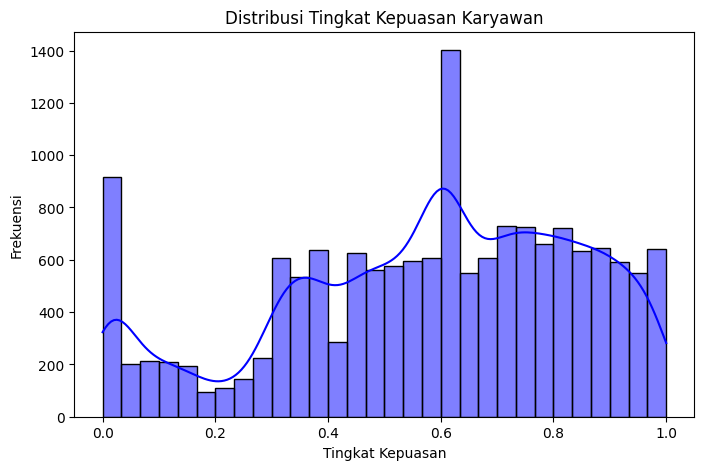

In [29]:
# Visualisasi distribusi tingkat kepuasan
plt.figure(figsize=(8, 5))
sns.histplot(data['satisfaction_level'], bins=30, kde=True, color='blue')
plt.title('Distribusi Tingkat Kepuasan Karyawan')
plt.xlabel('Tingkat Kepuasan')
plt.ylabel('Frekuensi')
plt.show()

In [30]:
# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Model klasifikasi menggunakan Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Evaluasi model
predictions = model.predict(X_test)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, predictions))


Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      0.99      1.00       154
           2       1.00      1.00      1.00       156
           3       0.95      0.93      0.94       148
           4       0.93      0.94      0.93       160
           5       0.93      0.93      0.93       107
           6       0.98      0.99      0.99       171
           7       0.99      0.99      0.99       173
           8       1.00      1.00      1.00       834
           9       1.00      1.00      1.00       445
          10       1.00      1.00      1.00       552

    accuracy                           0.99      3158
   macro avg       0.98      0.98      0.98      3158
weighted avg       0.99      0.99      0.99      3158



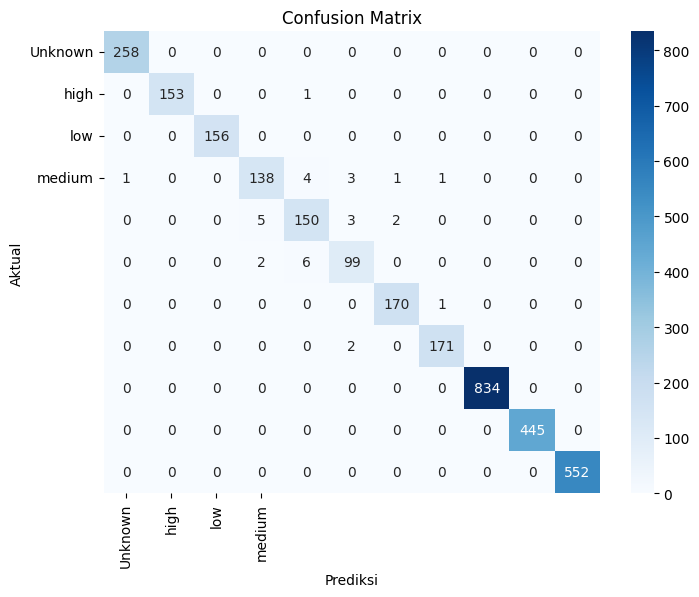

In [33]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()